# Star Wars Survey
---------

- In the following analysis we will be working with a Dataset about some questions compiled by the team at FiveThirtyEight, and address to the American Star Wars fan base.

- The purpose of the team with this surveys was to answer some questions such as: was the Episode V - The Empire Strikes Back, the favourite movie from the fans? If not which was? What were their favourite characters? Does Education levels from the side of the fans, present themselves as a differentiator in the rating of the 6 Star Wars movies from the saga? Do we see differences in the fan base tastes when we segment the data in terms of Gender. And what was the most seen movie of all?

- Because the Dataset had some dirty datapoints and some of the data was inserted in a columns dependency level we will need, prior to do the analysis, to do some cleaning. So first we will put our hands in the dough by cleaning what needs to be cleaned from the Dataset, and then we will do our analysis by resorting to some plots in order to better grasp the full potential of the data and to try to unlock some of its questions.

# Importing packages and dataset

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
print(star_wars.shape)
print('-------------------------------------------------------')
print('\n')
print(star_wars.head(3))

(1187, 38)
-------------------------------------------------------


   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           Response                      
1                                                Yes                      
2                                                NaN                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1           Star Wars: Episode I  The Phantom Menace                                    
2                                         

I also add the code below to center the plot output in this notebook 
(just my personal preference).
Click [here](https://www.science-emergence.com/Articles/How-to-center-a-matplotlib-figure-in-a-Jupyter-notebook-/) for reference.

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

------------

# Getting familiar with the dataset

Before we can do anything to the dataset, we need to get to know the information that we can use or we need to remove.
We will:
1. Display all the column names
2. Identifying values in the columns
3. Group the columns based on the question and answer
4. Identify which columns need to be removed first

So let's do that!

### 1. Displaying the column names

In [3]:
col_names = [x for x in star_wars.columns]
col_names

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

### 2. Identifying values in the columns

The reason why we want to do this is to have a picture of what values we want to have in our cleaned data sets.

We can display all the values (including NaNs) in each columns using a for loop that iterate all the column names as below:

In [4]:
for x in star_wars.columns:
    print('-------------------------------------------------------')
    print(x+' column')
    print('-------------------------------------------------------')
    print(star_wars[x].value_counts(dropna=False))
    print('-------------------------------------------------------')
    print('NaN percentage is: ' + str((star_wars[x].isnull().sum() / len(star_wars[x]))*100))
    print('-------------------------------------------------------')
    print('\n')

-------------------------------------------------------
RespondentID column
-------------------------------------------------------
 3.291092e+09    1
 3.290409e+09    1
 3.290347e+09    1
 3.290351e+09    1
 3.288558e+09    1
 3.290360e+09    1
 3.290365e+09    1
 3.290372e+09    1
 3.290375e+09    1
 3.290380e+09    1
 3.290387e+09    1
 3.290399e+09    1
 3.291392e+09    1
 3.290402e+09    1
 3.290409e+09    1
 3.290412e+09    1
 3.290418e+09    1
 3.290345e+09    1
 3.290337e+09    1
 3.289919e+09    1
 3.290330e+09    1
 3.290263e+09    1
 3.290266e+09    1
 3.290407e+09    1
 3.290280e+09    1
 3.290662e+09    1
 3.290287e+09    1
 3.290289e+09    1
 3.290296e+09    1
 3.290298e+09    1
                ..
 3.288591e+09    1
 3.290655e+09    1
 3.292719e+09    1
 3.289446e+09    1
 3.292731e+09    1
 3.290597e+09    1
 3.289532e+09    1
 3.291023e+09    1
 3.292765e+09    1
 3.289986e+09    1
 3.289598e+09    1
 3.290651e+09    1
 3.292664e+09    1
 3.292654e+09    1
 3.292581e+09

### 3. Group the columns based on the question and answer

After we display all the values for each columns it's quite easy to see that we need to group some column based on the question and responses.

For example, **'Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'** columns are actually the responses for **Which of the following Star Wars films have you seen?** question.

By grouping them into a list we can use the list later to modify the column names or values to get the clean data we need.

We will do that for other columns that has the same nature as well.

In [5]:
star_wars_seen = [
'Which of the following Star Wars films have you seen? Please select all that apply.',
'Unnamed: 4',
'Unnamed: 5',
'Unnamed: 6',
'Unnamed: 7',
'Unnamed: 8'   
]

fav_star_wars = [
'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
'Unnamed: 10',
'Unnamed: 11',
'Unnamed: 12',
'Unnamed: 13',
'Unnamed: 14'    
]

fav_char = [
'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
'Unnamed: 16',
'Unnamed: 17',
'Unnamed: 18',
'Unnamed: 19',
'Unnamed: 20',
'Unnamed: 21',
'Unnamed: 22',
'Unnamed: 23',
'Unnamed: 24',
'Unnamed: 25',
'Unnamed: 26',
'Unnamed: 27',
'Unnamed: 28'    
]

### 4. Identify which columns need to be removed first

After identifying the columns that can be grouped (the ones that we definitely can't get rid of), now we'll look at the columns that we might want to remove depending on the number of non-filled rows.

We'll do something similar to what we've done in the above, but for the columns we want to take a closer look at only.

In [6]:
survey_col = [
'Have you seen any of the 6 films in the Star Wars franchise?',
'Do you consider yourself to be a fan of the Star Wars film franchise?',
'Which character shot first?',
'Are you familiar with the Expanded Universe?',
'Do you consider yourself to be a fan of the Expanded Universe?Â\x8cÃ¦',
'Do you consider yourself to be a fan of the Star Trek franchise?',
'Gender',
'Age',
'Household Income',
'Education',
'Location (Census Region)'
]

for x in survey_col:
    print('-------------------------------------------------------')
    print(x+' column')
    print('-------------------------------------------------------')
    print(star_wars[x].value_counts(dropna=False))
    print('-------------------------------------------------------')
    print('NaN percentage is: ' + str((star_wars[x].isnull().sum() / len(star_wars[x]))*100))
    print('-------------------------------------------------------')
    print('\n')

-------------------------------------------------------
Have you seen any of the 6 films in the Star Wars franchise? column
-------------------------------------------------------
Yes         936
No          250
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
-------------------------------------------------------
NaN percentage is: 0.0
-------------------------------------------------------


-------------------------------------------------------
Do you consider yourself to be a fan of the Star Wars film franchise? column
-------------------------------------------------------
Yes         552
NaN         350
No          284
Response      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
-------------------------------------------------------
NaN percentage is: 29.486099410278012
-------------------------------------------------------


-------------------------------------------------------
Whi

Looking at the result, I don't think I want to remove any of the columns cause I want to use them all in the analysis. The questions rather, is more about what to do with the NaNs. We can impute the values for some of the columns, such as the Household Income, but some we might need to leave it as it is.

------------

# Initial clean-up!

After reading the dataset, there are a couple of things that we can quickly notice will need some tidying:
1. Removing the first row, which is the only one with blank RespondentID
2. Renaming the column names
3. Replacing the column values 

### 1. Removing the row with blank RespondentID

This is fairly easy to do. But before we do it, let's document some important information from the row. The row that we want to remove is actually the only one with blank RespondentID, and this is because it's part of the survey header with details related to the question.

Let's check it out for ourself:

In [7]:
star_wars.iloc[0]

RespondentID                                                                                                                                                                              NaN
Have you seen any of the 6 films in the Star Wars franchise?                                                                                                                         Response
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                                                                Response
Which of the following Star Wars films have you seen? Please select all that apply.                                                                  Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                                                                                        Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                        

Sure enough, the values in this row for Unnamed: 4 to Unnamed: 8 are part of the question, like we mentioned in the previous section.
The same thing goes for Unnamed: 16 to Unnamed: 28 are actuall the characters being asked in the question. 

We'll use this info to create a dictionaries to rename the respective columns later. But first, let's remove the row and check the result:

In [8]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,

Yup. That looks good. Now let's move on ahead to our next step 👇🏽 

### 2. Renaming the columns

A lot to do on this one, but we can do it group by group. Let's start by creating a dictionary.

In [9]:
col_new = {
'Have you seen any of the 6 films in the Star Wars franchise?':'Seen any Star Wars',
'Do you consider yourself to be a fan of the Star Wars film franchise?':'Star Wars fan',
'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
'Unnamed: 4':'seen_2',
'Unnamed: 5':'seen_3',
'Unnamed: 6':'seen_4',
'Unnamed: 7':'seen_5',
'Unnamed: 8':'seen_6',  
'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'Star Wars: Episode I The Phantom Menace',
'Unnamed: 10':'Star Wars: Episode II Attack of the Clones',
'Unnamed: 11':'Star Wars: Episode III Revenge of the Sith',
'Unnamed: 12':'Star Wars: Episode IV A New Hope',
'Unnamed: 13':'Star Wars: Episode V The Empire Strikes Back',
'Unnamed: 14':'Star Wars: Episode VI Return of the Jedi',    
'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han Solo',
'Unnamed: 16':'Luke Skywalker',
'Unnamed: 17':'Princess Leia Organa',
'Unnamed: 18':'Anakin Skywalker',
'Unnamed: 19':'Obi Wan Kenobi',
'Unnamed: 20':'Emperor Palpatine',
'Unnamed: 21':'Darth Vader',
'Unnamed: 22':'Lando Calrissian',
'Unnamed: 23':'Boba Fett',
'Unnamed: 24':'C-3P0',
'Unnamed: 25':'R2 D2',
'Unnamed: 26':'Jar Jar Binks',
'Unnamed: 27':'Padme Amidala',
'Unnamed: 28':'Yoda',
'Do you consider yourself to be a fan of the Expanded Universe?Â\x8cÃ¦':'Expanded universe fan',
'Do you consider yourself to be a fan of the Star Trek franchise?':'Star Trek fan'
}


Which will be mapped to the star_wars.columns,

In [10]:
star_wars.rename(columns=col_new,inplace=True)
star_wars.head(2)

,RespondentID,Seen any Star Wars,Star Wars fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Star Wars: Episode I The Phantom Menace,...,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Expanded universe fan,Star Trek fan,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


Once that's done, we can work on the column values.

### 3. Replacing the column values 

Some of the values we'll switch to boolean, some we'll impute and some... well I think that's about it or now.

Let's group them:

In [11]:
seen = ['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']

titles = [
'Star Wars: Episode I The Phantom Menace',
'Star Wars: Episode II Attack of the Clones',
'Star Wars: Episode III Revenge of the Sith',
'Star Wars: Episode IV A New Hope',
'Star Wars: Episode V The Empire Strikes Back',
'Star Wars: Episode VI Return of the Jedi'
] 

char = [
'Han Solo',
'Luke Skywalker',
'Princess Leia Organa',
'Anakin Skywalker',
'Obi Wan Kenobi',
'Emperor Palpatine',
'Darth Vader',
'Lando Calrissian',
'Boba Fett',
'C-3P0',
'R2 D2',
'Jar Jar Binks',
'Padme Amidala',
'Yoda',
]

We will also make the following changes:
1. For the **seen** columns, we want to turn the values to bool: False for NaN and True for else. And for the **titles**, we will convert the values to _float_
2. We'll convert the categories in the character polls to integer so we can calculate the popularity
3. We'll use the mean in the Household income columns values
4. We'll convert the Nan in ['Household Income','Location (Census Region)','Education','Age','Gender'] columns to 'Not specified'


In [12]:
for r in seen:
    star_wars[r] = star_wars[r].notna()

for r in titles:
    star_wars[r] = star_wars[r].astype(float)

survey_col_u = [
'Seen any Star Wars',
'Star Wars fan',
'Which character shot first?',
'Are you familiar with the Expanded Universe?',
'Expanded universe fan',
'Star Trek fan',
'Gender',
'Age',
'Household Income',
'Education',
'Location (Census Region)'
]
    
star_wars[survey_col_u] = star_wars[survey_col_u].replace('Yes',True).replace('No',False)

pop_score = {
'Very favorably':2,
'Somewhat favorably':1,
'Neither favorably nor unfavorably (neutral)':0,    
'Unfamiliar (N/A)':0,                                
'Somewhat unfavorably':-1,                             
'Very unfavorably':-2
}    

for r in char:
    star_wars[r] = star_wars[r].map(pop_score)
    
avg_income = {
'$50,000 - $99,999':75000,
'$25,000 - $49,999':37500,
'$100,000 - $149,999':12500,
'$0 - $24,999':12500,
'$150,000+':150000
}
star_wars['avg_income'] = star_wars['Household Income'].map(avg_income,na_action='ignore')

star_wars[['Household Income','Location (Census Region)','Education','Age','Gender']] = star_wars[['Household Income','Location (Census Region)','Education','Age','Gender']].fillna('Not Specified')


---------------

# Working on the analysis

After finally cleaning up the data, we can start working on our analysis.

We can:
1. Calculate the mean of ranking for each movies to see which one is the most popular (lowest score means more people rank that particular movie as their favorite)
2. Calculate the sum of the seen columns to see which movie is the most watched 
3. See if there is a significant difference between the Male and Female gender for the analysis done in point 1 and 2.
4. Which character is the most liked and the most disliked?
5. What does the "Which character shot first?" has anything to do with the survey?

### 1. Which movie ranks the best?

In [13]:
for r in titles:
    print(r + '\'s mean rank: ' + str(star_wars[r].mean()))

Star Wars: Episode I The Phantom Menace's mean rank: 3.7329341317365268
Star Wars: Episode II Attack of the Clones's mean rank: 4.087320574162679
Star Wars: Episode III Revenge of the Sith's mean rank: 4.341317365269461
Star Wars: Episode IV A New Hope's mean rank: 3.272727272727273
Star Wars: Episode V The Empire Strikes Back's mean rank: 2.513157894736842
Star Wars: Episode VI Return of the Jedi's mean rank: 3.047846889952153


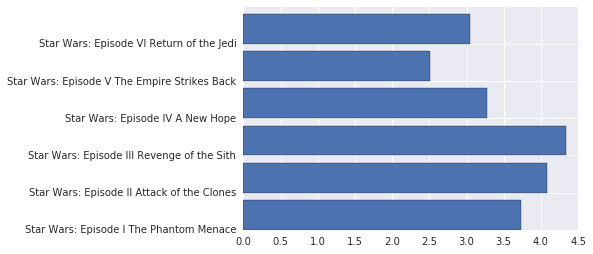

In [14]:
plt.barh(range(6), star_wars[titles].mean())
plt.yticks(range(6),titles)
plt.show()

From what we can gather, __Episode V: The Empire Strikes Back__ ranks the best among all 6 series. This is most likely because it's highly anticipated to begin with following and also managed to deliver.

### 2. Most seen Star Wars episode?
Given the result in the previous analysis, we might guess that Episode V is also the most watched. But are they? Let's do a quick calculation to prove this.

In [15]:
for r in seen:
    print(r + '\'s total watched number: ' + str(star_wars[r].sum()))

seen_1's total watched number: 673
seen_2's total watched number: 571
seen_3's total watched number: 550
seen_4's total watched number: 607
seen_5's total watched number: 758
seen_6's total watched number: 738


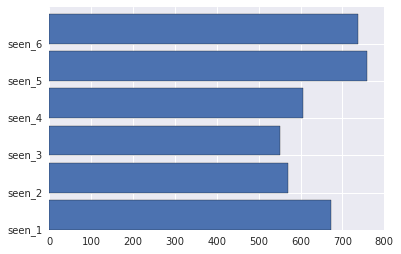

In [16]:
plt.barh(range(6), star_wars[seen].sum())
plt.yticks(range(6),seen)
plt.show()

With this, we've proven that Ep V is not only the most favorited, it's also the most watched episode in the Star Wars franchise.

### 3. Guys vs. girls?

Now to take a deeper look, we can do a how the analysis done in the above differs between opposite gender. We'll split the dataset based on the gender:

In [17]:
male = star_wars[star_wars["Gender"] == "Male"]
female = star_wars[star_wars["Gender"] == "Female"]

and repeat the analysis done in the above, first for 

### **Male**

Star Wars: Episode I The Phantom Menace's mean rank: 3.7329341317365268
Star Wars: Episode II Attack of the Clones's mean rank: 4.087320574162679
Star Wars: Episode III Revenge of the Sith's mean rank: 4.341317365269461
Star Wars: Episode IV A New Hope's mean rank: 3.272727272727273
Star Wars: Episode V The Empire Strikes Back's mean rank: 2.513157894736842
Star Wars: Episode VI Return of the Jedi's mean rank: 3.047846889952153


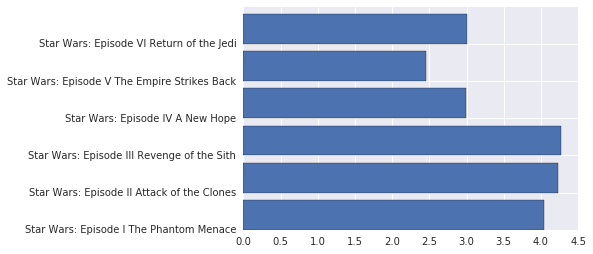

In [18]:
for r in titles:
    print(r + '\'s mean rank: ' + str(star_wars[r].mean()))

plt.barh(range(6), male[titles].mean())
plt.yticks(range(6),titles)  
plt.show()

seen_1's total watched number: 361
seen_2's total watched number: 323
seen_3's total watched number: 317
seen_4's total watched number: 342
seen_5's total watched number: 392
seen_6's total watched number: 387


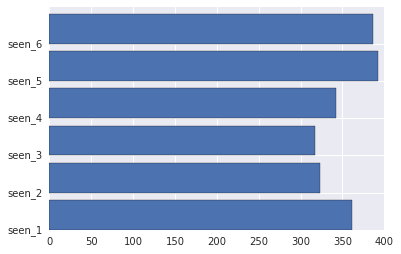

In [19]:
for r in seen:
    print(r + '\'s total watched number: ' + str(male[r].sum()))
    
plt.barh(range(6), male[seen].sum())
plt.yticks(range(6),seen)
plt.show()

and then for 

### **Female**:

Star Wars: Episode I The Phantom Menace's mean rank: 3.4292929292929295
Star Wars: Episode II Attack of the Clones's mean rank: 3.954659949622166
Star Wars: Episode III Revenge of the Sith's mean rank: 4.418136020151134
Star Wars: Episode IV A New Hope's mean rank: 3.544080604534005
Star Wars: Episode V The Empire Strikes Back's mean rank: 2.5692695214105794
Star Wars: Episode VI Return of the Jedi's mean rank: 3.0780856423173804


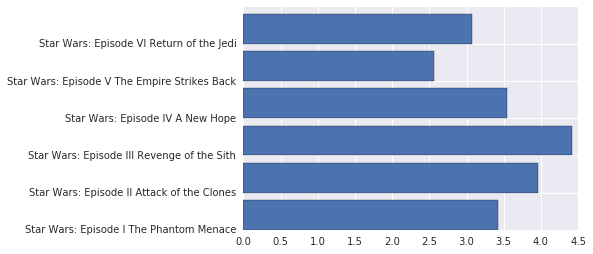

In [20]:
for r in titles:
    print(r + '\'s mean rank: ' + str(female[r].mean()))

plt.barh(range(6), female[titles].mean())
plt.yticks(range(6),titles)   
plt.show()

seen_1's total watched number: 298
seen_2's total watched number: 237
seen_3's total watched number: 222
seen_4's total watched number: 255
seen_5's total watched number: 353
seen_6's total watched number: 338


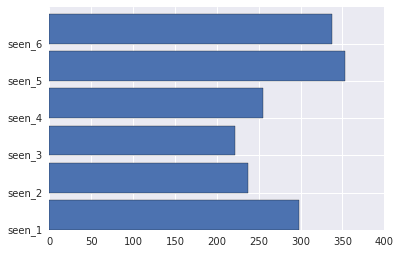

In [21]:
for r in seen:
    print(r + '\'s total watched number: ' + str(female[r].sum()))
    
plt.barh(range(6), female[seen].sum())
plt.yticks(range(6),seen)
plt.show()

The result between gender didn't show any significant difference and both returned **Episode V** as the most seen and favorited episode within the series.

**Episode I-III** seems to be the less popular trilogy with generally a lower ranking in Male gender. However **Episode III** in particular seems to be the least favorited by both gender. 

Interestingly the ranking for **Episode III** is even lower in the female gender. This might be affected by the plot which is really the most heart breaking one, resulting a lower ranking among the Female gender group.

### 4. Who's your most (or least) favorite character?

Now for what I personally think is the most interesting question, which one is the most popular or least popular?

To prepare for this analysis, we have previously convert the data in character columns which will allow us to sum all the rating given and come up with a ranking.

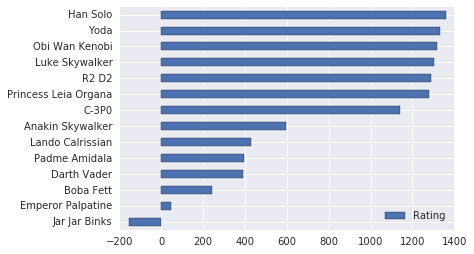

In [22]:
char_rating = {}
for r in char:
    char_rating[r] = star_wars[r].sum()
char_df = pd.DataFrame.from_dict(char_rating, orient='index')
char_df.rename(columns={0:'Rating'},inplace=True)
char_df = char_df.sort_values(by='Rating',ascending=True)
ax = char_df.plot.barh()

Interestingly, it's Han Solo who is the most popular character, not the Jedi or Jedi Master - although the ratings for Yoda and Obi-Wan are not that far behind.

To conclude our answer for this question, we can quickly show the top 3 most favorite and least favorite characters below:

### Top 3 favorite Star Wars characters:

In [23]:
char_df.sort_values(by='Rating',ascending=False).head(3)

,Rating
Han Solo,1361.0
Yoda,1330.0
Obi Wan Kenobi,1319.0


### Top 3 least favorite Star Wars characters:

In [24]:
char_df.sort_values(by='Rating',ascending=True).head(3)

,Rating
Jar Jar Binks,-156.0
Emperor Palpatine,47.0
Boba Fett,243.0


_ps: Jar Jar Binks actually rated positive (still in the bottom 3 though) in senior age group (> 60 y.o), particularly in the female senior age group.*_ 

### The most controversial?

Logically speaking, the character with the closest rating to zero, which is Palpatine's rating of 47should be the most divided. Let's do a value_counts() on Emperor Palpatine's column to see if this is the case.

In [25]:
star_wars['Emperor Palpatine'].value_counts()

 0.0    369
 1.0    143
-2.0    124
 2.0    110
-1.0     68
Name: Emperor Palpatine, dtype: int64

Looking at the numbers, we can agree that this character has an almost evenly split rating between the positive and negative.
Kudos to **Emperor Palpatine** for achieving the **most controversial character** in this survey.

### 5. Who shot first?

Why is there this question on this survey and what does it mean?
For the heck of it, I used the plot_null_correlations() function and try to find the correlation it might have, if there's any.

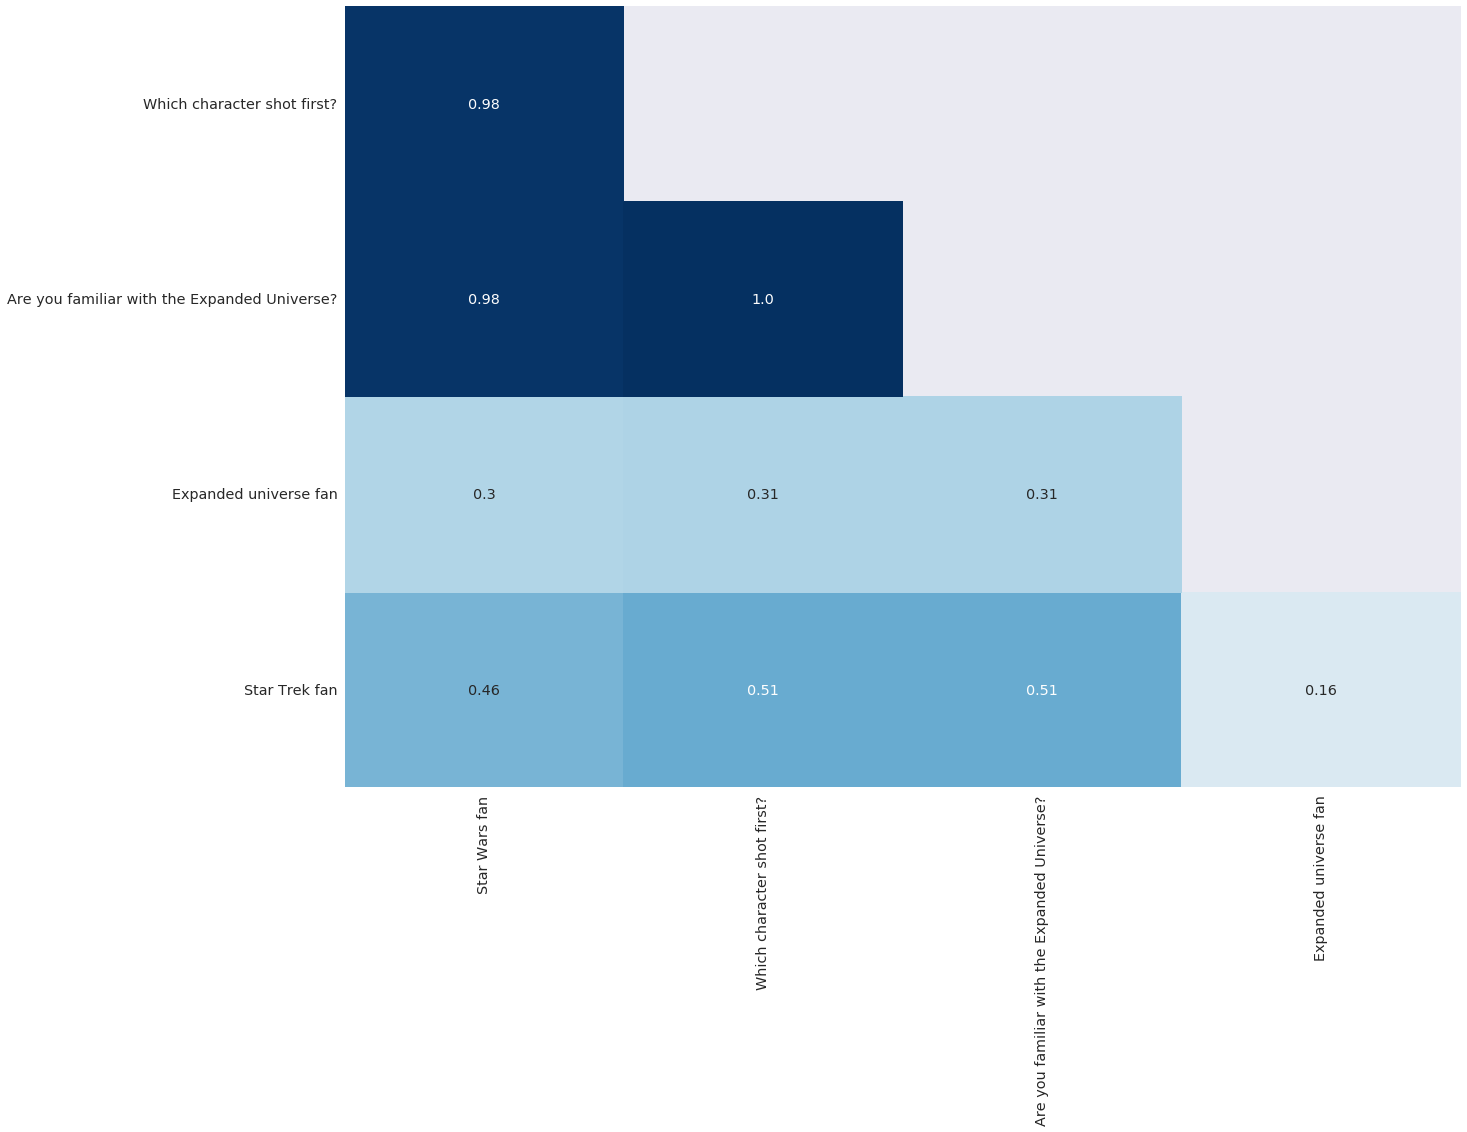

In [26]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
    
who_shot = ['Star Wars fan', 
'Which character shot first?',
'Are you familiar with the Expanded Universe?', 
'Expanded universe fan',
'Star Trek fan'
]

plot_null_correlations(star_wars[who_shot])

Turn's out the **"Who shot first?"** column correlates highly with the "Star Wars fan" column. 

This topic was a controversy at its time among Star Wars fan due to an edit of Han shooting Greedo scene that was made when Episode IV was re-released in 1997 for Star Wars 20 years commemmoration. It was then altered again when the 2004 version was released. 

Click [here](https://www.vox.com/culture/2019/11/13/20963415/disney-plus-star-wars-han-shot-first-greedo-edit) for more reading on this topic.

------------

## Conclusion

Star Wars Episode V: The Empire Strikes Back is proven to be the most popular episode in the franchise based on the survey result. Contrary to  team [FiveThirtyEight](http://fivethirtyeight.com/)'s hypothesis, Episode IV is actually the runner-up of the bunch.

Aside from the episode, we also can conclude that Han Solo is undoubtedly the most favorite character (unanimous among age group, gender and education group).

There are plenty more analysis that we can do, and I went as far as looking into favorite characters for data segmented based on age, education or gender, but I will leave it at the analysis done from point number 1 to 5.

_*) I used the code I commented out below to check the episode rank and character rating in different segment of the data._ 

In [27]:
# grouped = star_wars.groupby('Education')
# age_group = star_wars.groupby('Age')
# shot_group = star_wars.groupby('Which character shot first?')

# young = age_group.get_group('18-29')
# adult = age_group.get_group('30-44')
# mature = age_group.get_group('45-60')
# senior = age_group.get_group('> 60')

# team_han = shot_group.get_group('Han')
# team_greedo = shot_group.get_group('Greedo')

# bach = grouped.get_group('Bachelor degree')
# grad = grouped.get_group('Graduate degree')
# hs = grouped.get_group('High school degree')
# hs_less = grouped.get_group('Less than high school degree')

# edu_list = [bach, grad, hs, hs_less]
# gender_list = [male, female]
# age_list = [young, adult, mature, senior]

# def char_rank(df):
#     char_rating = {}
#     for r in char:
#         char_rating[r] = df[r].sum()
#     char_df = pd.DataFrame.from_dict(char_rating, orient='index')
#     char_df.rename(columns={0:'Rating'},inplace=True)
#     char_df = char_df.sort_values(by='Rating',ascending=True)
#     ax = char_df.plot.barh()
#     return ax

# def ep_rank(df):
#     plt.barh(range(6), df[titles].mean())
#     plt.yticks(range(6),titles)   
#     plt.show()
    
# for r in edu_list:
#     ep_rank(r)